# PHYS 331 – Numerical Techniques for the Sciences I
## Homework 7: Fourier transforms I
### Problem 2 -  Gibbs phenomenon (15 points)
---
Name: *Viktorya Hunanyan*

Onyen: *730707661*

Cell for *Problem 2* is below.

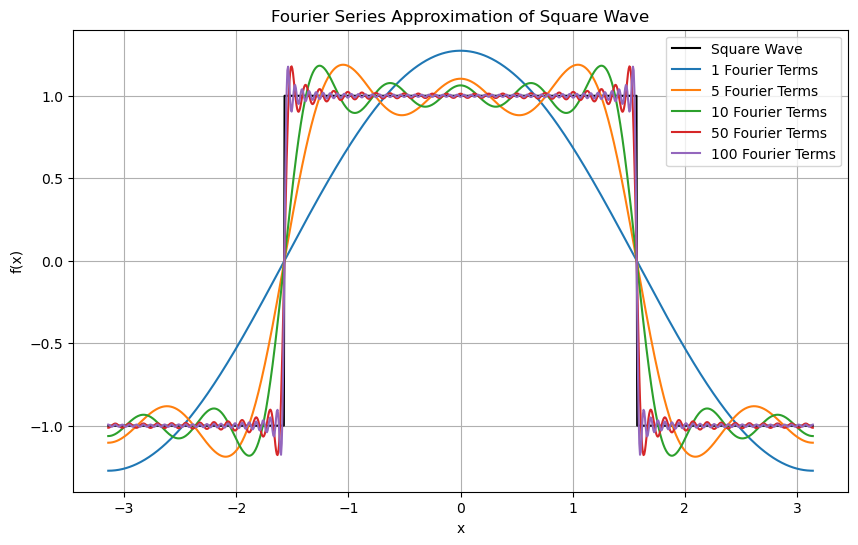

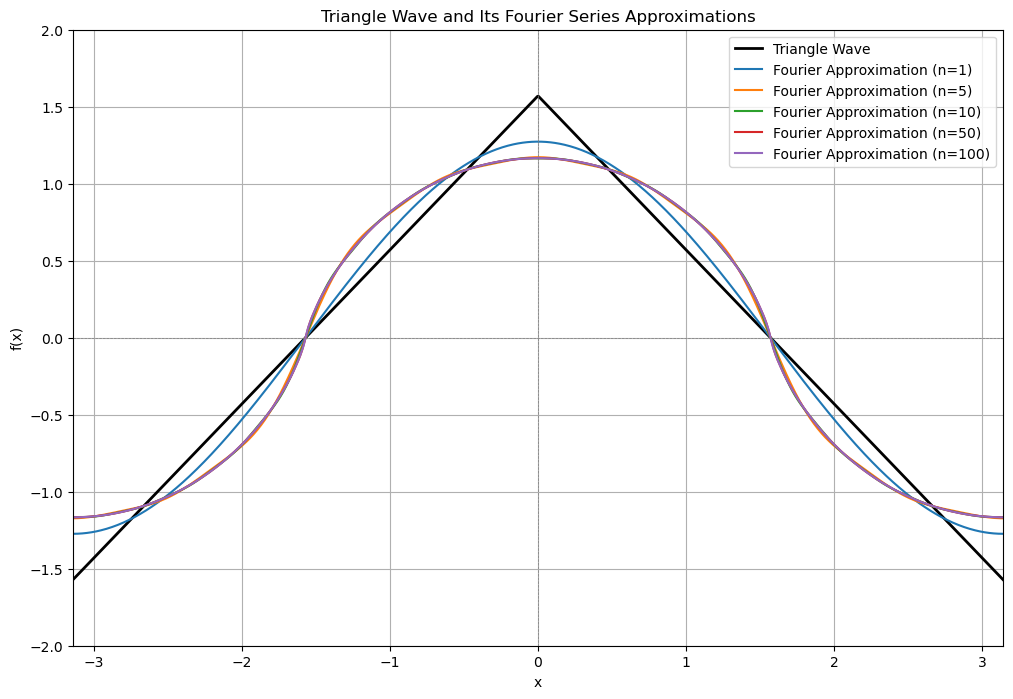

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def sqwave(x):
    return np.where((x >= -np.pi/2) & (x <= np.pi/2), 1, -1)


def sqwavePartialSum(x, m):
    result = np.zeros_like(x)
    for n in range(1, m + 1, 2):  # Only odd n contribute
        result += (4 / (n * np.pi)) * np.sin(n * (x + np.pi / 2))
    return result

def trwave(x):
    """
    Calculates the triangle-wave function.
    
    PARAMETERS:
        x -- input (numpy array or scalar);
             
    RETURNS:
        Triangle wave function evaluated at x.
    """
    # Initialize an array to hold the triangle wave values
    wave = np.zeros_like(x)
    
    # Calculate the triangle wave function values
    wave[(x >= -np.pi) & (x <= 0)] = (np.pi / 2) + x[(x >= -np.pi) & (x <= 0)]
    wave[(x > 0) & (x <= np.pi)] = (np.pi / 2) - x[(x > 0) & (x <= np.pi)]
    
    return wave

def trwavePartialSum(x, m):
    """
    Calculates the triangle-wave function using m Fourier terms .
    
    PARAMETERS:
        x -- input (numpy array or scalar);
        m -- number of Fourier terms
             
    RETURNS:
        Triangle wave function using m Fourier terms evaluated at x.
    """
    # Initialize the sum to zero
    sum_terms = np.zeros_like(x)
    
    # Calculate the sum of the first m odd Fourier terms
    for k in range(m):
        n = 2 * k + 1  # Only odd terms
        # Update the sum with the Fourier series formula
        sum_terms += (4 / np.pi) * ((-1) ** k) * (np.cos(n * x) / (n ** 2))
        
    return sum_terms


def main():
    # ??? Write your plotting commands here. ???
    # Define x range
    x = np.linspace(-np.pi, np.pi, 1000)
    
    # Plot square wave and Fourier approximations with different terms
    plt.figure(figsize=(10, 6))
    plt.plot(x, sqwave(x), label="Square Wave", color="black", linewidth=1.5)
    
    # Fourier approximations with different number of terms
    for terms in [1, 5, 10, 50, 100]:
        plt.plot(x, sqwavePartialSum(x, terms), label=f"{terms} Fourier Terms")
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Fourier Series Approximation of Square Wave")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Define the range for x
    x = np.linspace(-np.pi, np.pi, 1000)
    
    # Calculate the original triangle wave
    triangle_wave = trwave(x)
    
    # Set the number of terms to use for approximation
    terms_list = [1, 5, 10, 50, 100]
    
    # Create a plot
    plt.figure(figsize=(12, 8))
    
    # Plot the original triangle wave
    plt.plot(x, triangle_wave, label='Triangle Wave', color='black', linewidth=2)
    
    # Overlay plots for different numbers of Fourier terms
    for m in terms_list:
        approx_wave = trwavePartialSum(x, m)
        plt.plot(x, approx_wave, label=f'Fourier Approximation (n={m})')
    
    # Customize the plot
    plt.title('Triangle Wave and Its Fourier Series Approximations')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='gray', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid()
    plt.ylim(-2, 2)
    plt.xlim(-np.pi, np.pi)
    plt.show()


main()  # Don't delete the call to main() by mistake!


# Part c:
# You can describe your findings here.
"""
In this analysis, we examined the Fourier series approximations for both square and triangle waves, 
observing the effects of increasing the number of terms in the series. For the square wave, as we 
increased the number of terms (1, 5, 10, 50, and 100), the Fourier series provided a progressively 
closer approximation to the wave. However, a distinct overshoot near the discontinuities—known as 
the Gibbs phenomenon—became evident, especially for higher terms. This overshoot is characteristic 
of Fourier series approximations of functions with sharp discontinuities, where the series oscillates 
near the jumps and never quite reaches the exact value at these points. Despite adding more terms, 
the series cannot fully match the square wave's sharp edges, illustrating a fundamental limitation of 
Fourier series for discontinuous functions.

In contrast, the Fourier series approximation of the triangle wave behaved differently. The triangle 
wave, being continuous without abrupt jumps, allowed the Fourier series to converge more smoothly and
accurately, with fewer oscillations around the actual function. As we increased the number of terms, 
the Fourier series closely approximated the triangle wave without the pronounced overshoot seen in the 
square wave approximation. This smoother convergence highlights how Fourier series tend to approximate 
continuous functions more accurately than discontinuous ones.

In general, the Fourier series does a better job of matching continuous functions, like the triangle wave,
with fewer wiggles and faster accuracy. For functions with sudden jumps, like the square wave, the series 
tends to oscillate around the edges, needing a lot more terms to get close—but it still has trouble nailing
those sharp transitions exactly.
"""
